In [1]:
import mie_py

# one

In [2]:
mie = mie_py.Bohren_Huffman()
mie.parameters.no_of_angles = 15
# mie.parameters.diameter = 500

mie.parameters.diameter = 500
mie.parameters.wavelength  = 500

In [3]:
np.log(mie.phase_func.natural.max()),  np.log(mie.phase_func.natural.min()), np.log(mie.phase_func.natural.min()) * (1 - 0.05)

(2.3974406184496617, -2.075472474858318, -1.9716988511154019)

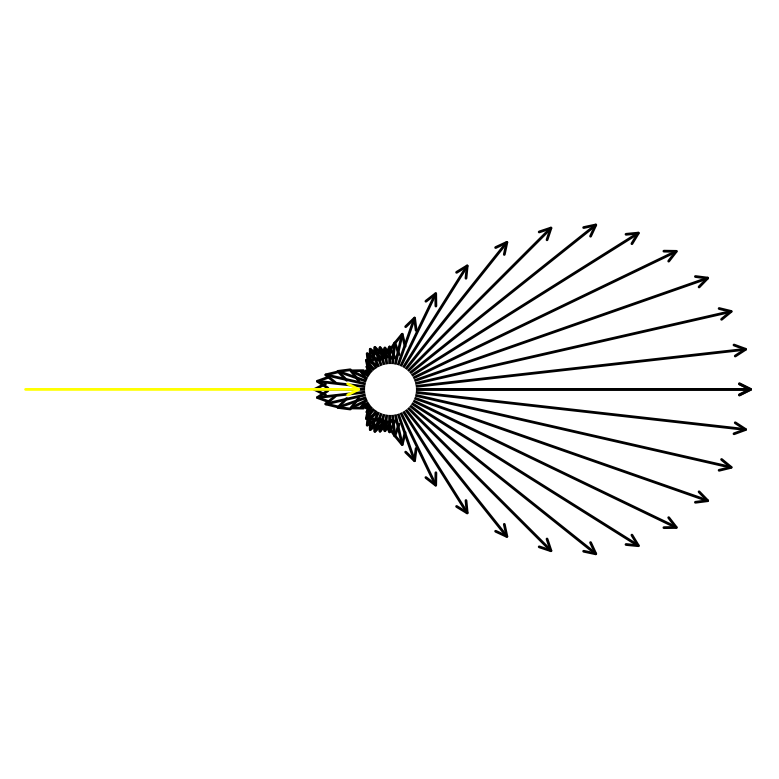

In [111]:
aa = []
f,a = plot(mie)
aa.append(a)

In [239]:
def plot(mie, rlim = None, limscale = (0.25, 0), norm = 'log', dscale = 2, arrow_tip_offset = 0.3, acolor = 'black'):
    f,a = plt.subplots(subplot_kw={'projection': 'polar'})
    data = mie.phase_func.natural
    if norm == 'log':
        data = np.log(data)
    if isinstance(rlim, type(None)):
        rmin = data.min() * (1 + limscale[0])
        rmax = data.max() * (1 + limscale[1])
    else:
        rmin, rmax = rlim
    
    for idx, row in pd.DataFrame(data).iterrows():
        aout = a.annotate('', xy=(idx, row.natural), xytext=(0, rmin),
                          arrowprops=dict(facecolor=a, arrowstyle='->'))
    
    # incomming light
    aout = a.annotate('', xytext=(np.pi, rmax), xy=(np.pi, rmin+arrow_tip_offset),
                       arrowprops=dict(color=colors[2], 
                                       # arrowstyle='->',
                                      )
                     )
    
    a.set_rlim(rmin, rmax)
    a.grid(False)
    a.spines['polar'].set_visible(False)
    a.set_xticks([])
    a.set_rticks([])
    sp = a.scatter(0, rmin, s = mie.parameters.diameter * dscale, zorder = 10)
    sp.set_facecolor('white')
    return f,a, aout

# Mie curve

In [15]:
# noangles = 15
wl = 550
n = 1.5
da = np.logspace(2,4, 500)
mie = mie_py.Bohren_Huffman()
# mie.parameters.no_of_angles = noangles
mie.parameters.wavelength  = wl
df = pd.DataFrame(index = da, columns = [n])
mie.parameters.refractive_index = n
for d in da:
    mie.parameters.diameter = d
    df.loc[d,n] = mie.extinction_crosssection

In [18]:
mie.extinction_crosssection

161697709.22975054

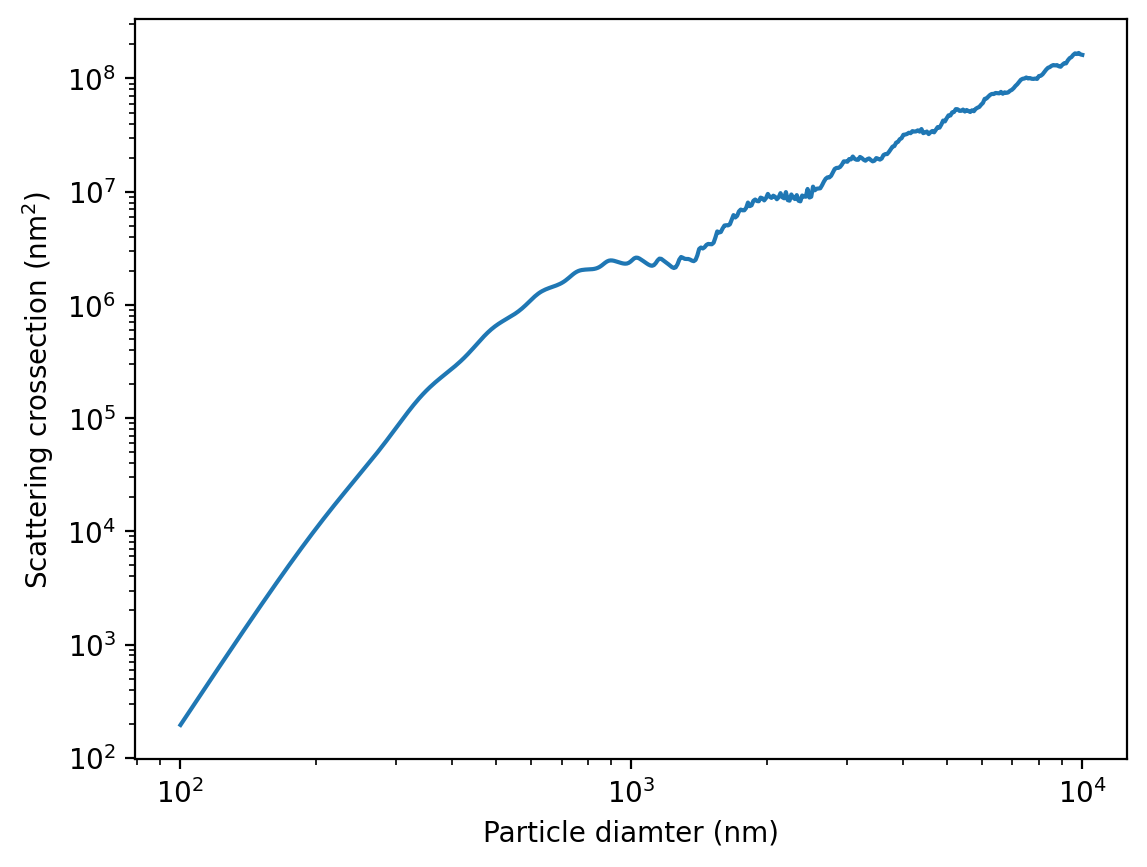

In [23]:
f,a = plt.subplots()
df.plot(ax = a)
a.set_xscale('log')
a.set_yscale('log')
a.set_xlabel('Particle diamter (nm)')
a.set_ylabel('Scattering crossection (nm$^2$)')
a.legend().remove()

# n comparison

In [32]:
# noangles = 15
wl = 500
da = np.logspace(2,4, 500)
na = [1.33, 1.5, 1.6]
mie = mie_py.Bohren_Huffman()
# mie.parameters.no_of_angles = noangles
mie.parameters.wavelength  = wl
df = pd.DataFrame(index = da, columns = na)
for n in na:
    mie.parameters.refractive_index = n
    for d in da:
        mie.parameters.diameter = d
        df.loc[d,n] = mie.extinction_crosssection


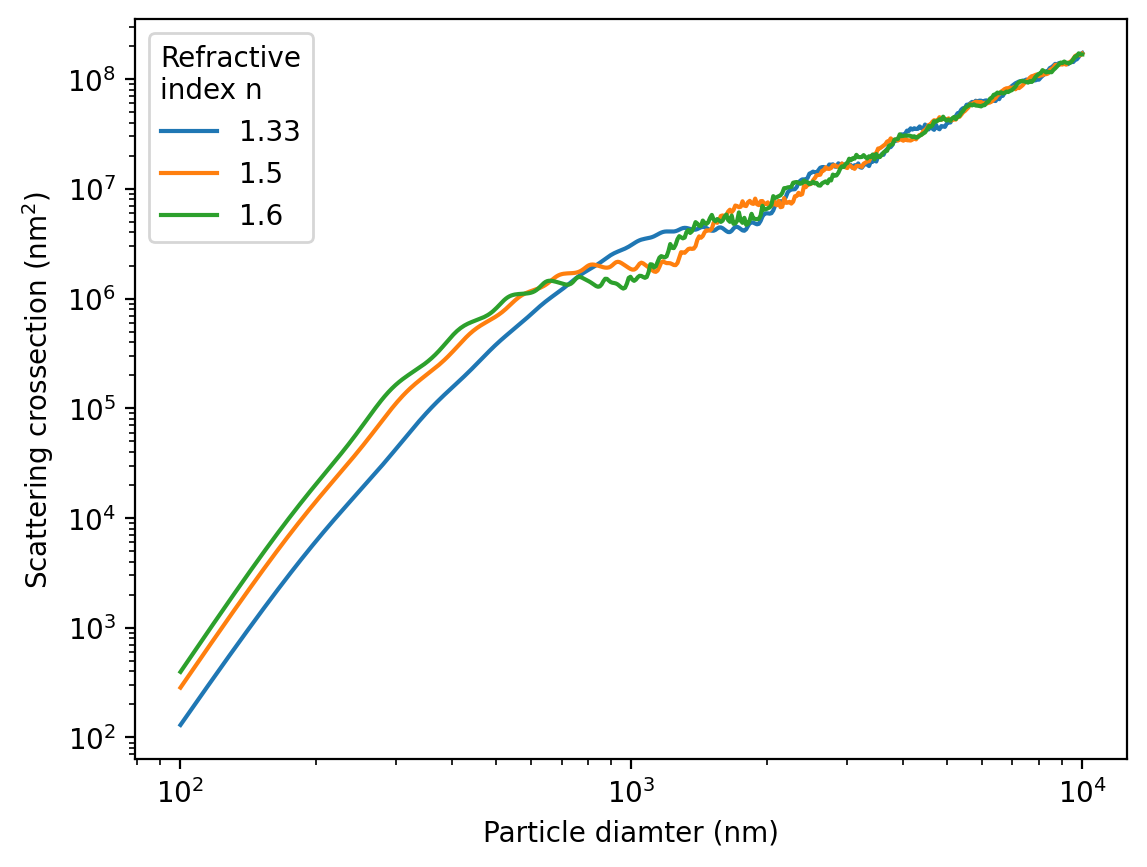

In [33]:
f,a = plt.subplots()
df.plot(ax = a)
a.loglog()

a.set_xlabel('Particle diamter (nm)')
a.set_ylabel('Scattering crossection (nm$^2$)')
a.legend(title = 'Refractive\nindex n')

In [257]:
noangles = 15
wl = 550
d = 100
mie = mie_py.Bohren_Huffman()
mie.parameters.no_of_angles = noangles
mie.parameters.wavelength  = wl
mie.parameters.diameter = d
mie.parameters.refractive_index = 1.33
mie1 = mie

mie = mie_py.Bohren_Huffman()
mie.parameters.no_of_angles = noangles
mie.parameters.wavelength  = wl
mie.parameters.diameter = d
mie.parameters.refractive_index = 1.5
mie2 = mie

mie = mie_py.Bohren_Huffman()
mie.parameters.no_of_angles = noangles
mie.parameters.wavelength  = wl
mie.parameters.diameter = d
mie.parameters.refractive_index = 1.7
mie3 = mie

miemie = [mie1, mie2, mie3]

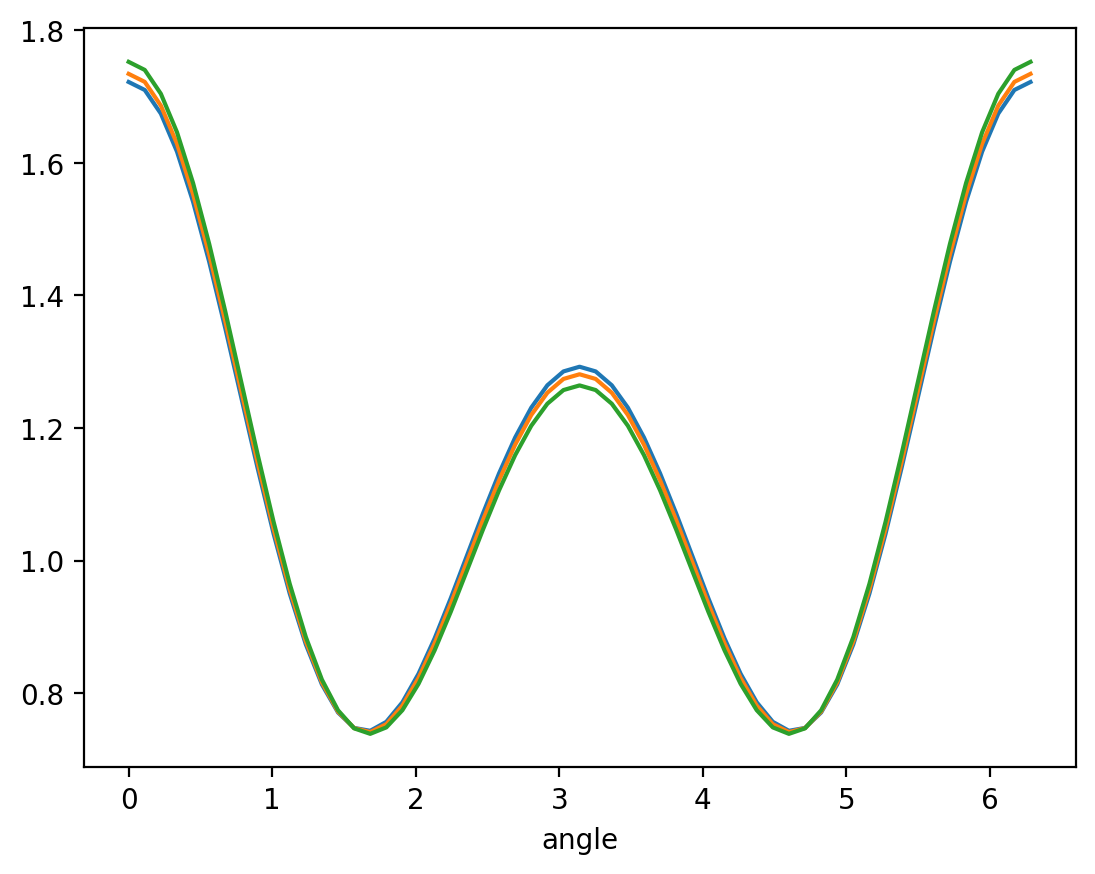

In [258]:
for mie in miemie:
    # break

    mie.phase_func.natural.plot()

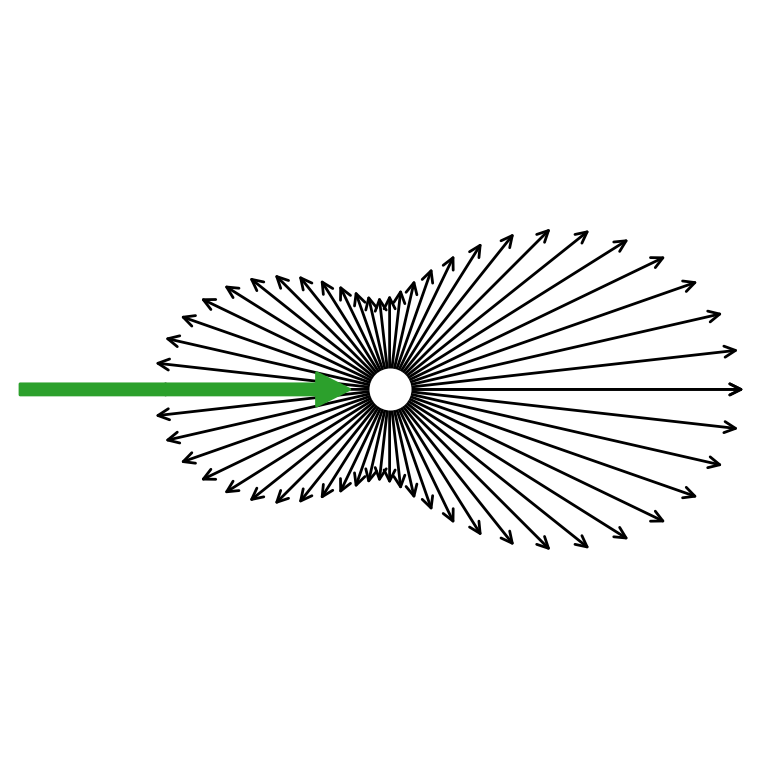

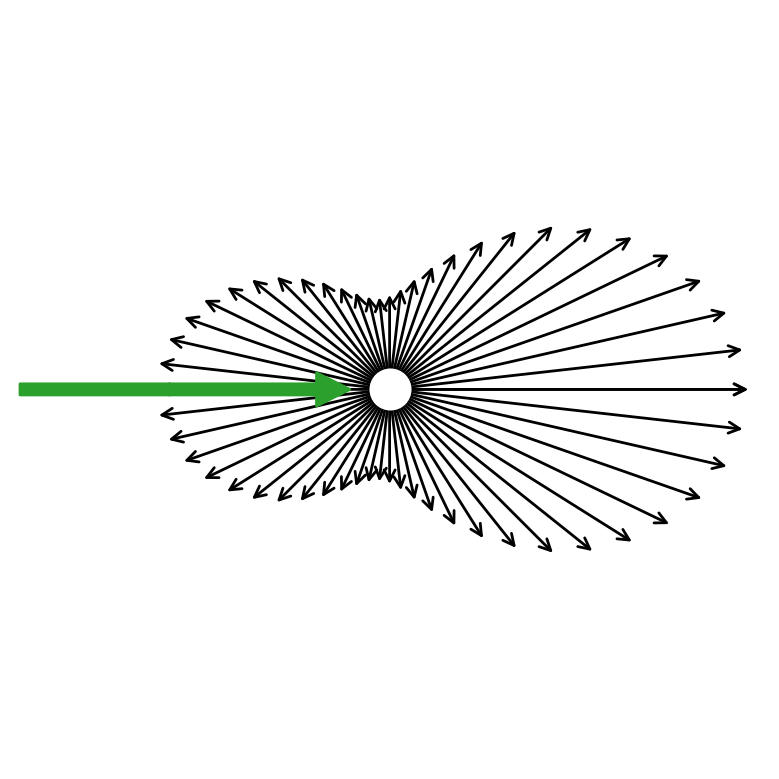

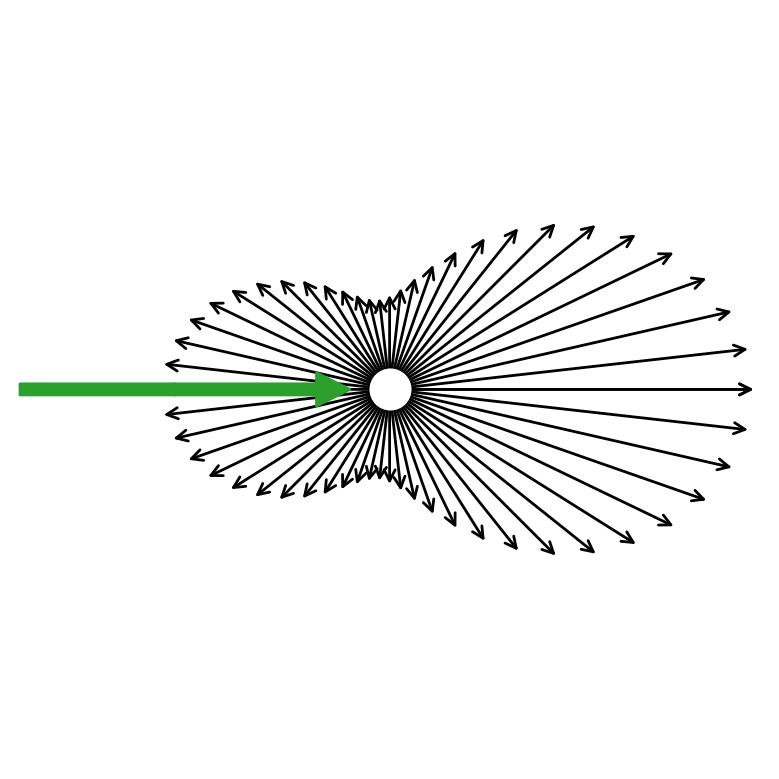

In [247]:
aa = []
rmin = np.min([mie.phase_func.natural.min() for mie in miemie]) * (1-0.5)
rmax = np.max([mie.phase_func.natural.max() for mie in miemie])# * (1+0.5)
rlim = (rmin, rmax)
norm = 'linear'
ato = 0.15
# rlim = None
out = plot(mie1, rlim = rlim, norm = norm, arrow_tip_offset=ato)
aa.append(out[1])
out = plot(mie2, rlim = rlim, norm = norm, arrow_tip_offset=ato)
aa.append(out[1])
out = plot(mie3, rlim = rlim, norm = norm, arrow_tip_offset=ato)
aa.append(out[1])

# size comparison

In [220]:
noangles = 15
wl = 550
mie = mie_py.Bohren_Huffman()
mie.parameters.no_of_angles = noangles
mie.parameters.wavelength  = wl
mie.parameters.diameter = 100
mie1 = mie

mie = mie_py.Bohren_Huffman()
mie.parameters.no_of_angles = noangles
mie.parameters.wavelength  = wl
mie.parameters.diameter = 150
mie2 = mie

mie = mie_py.Bohren_Huffman()
mie.parameters.no_of_angles = noangles
mie.parameters.wavelength  = wl
mie.parameters.diameter = 180
mie3 = mie

miemie = [mie1, mie2, mie3]

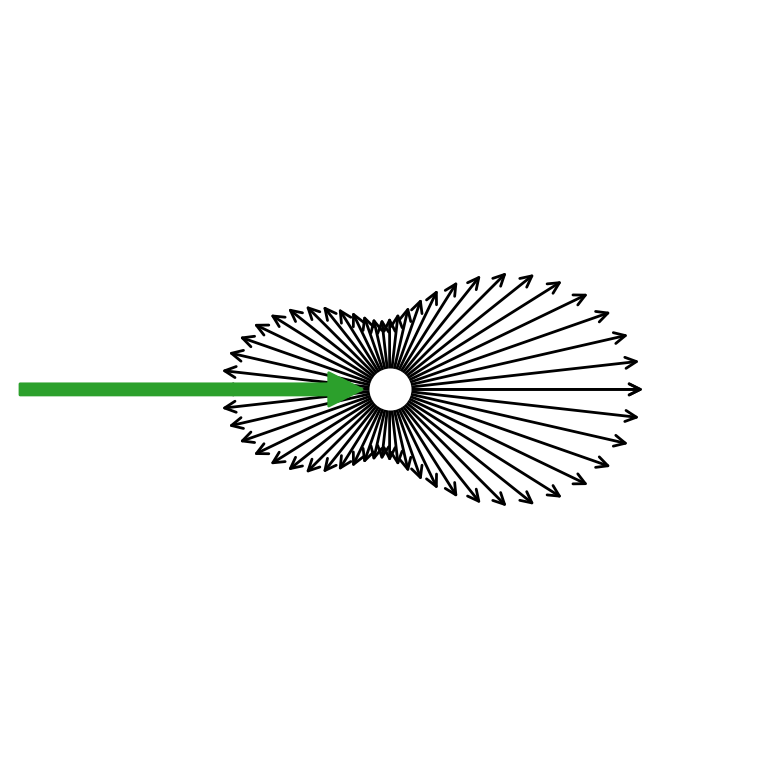

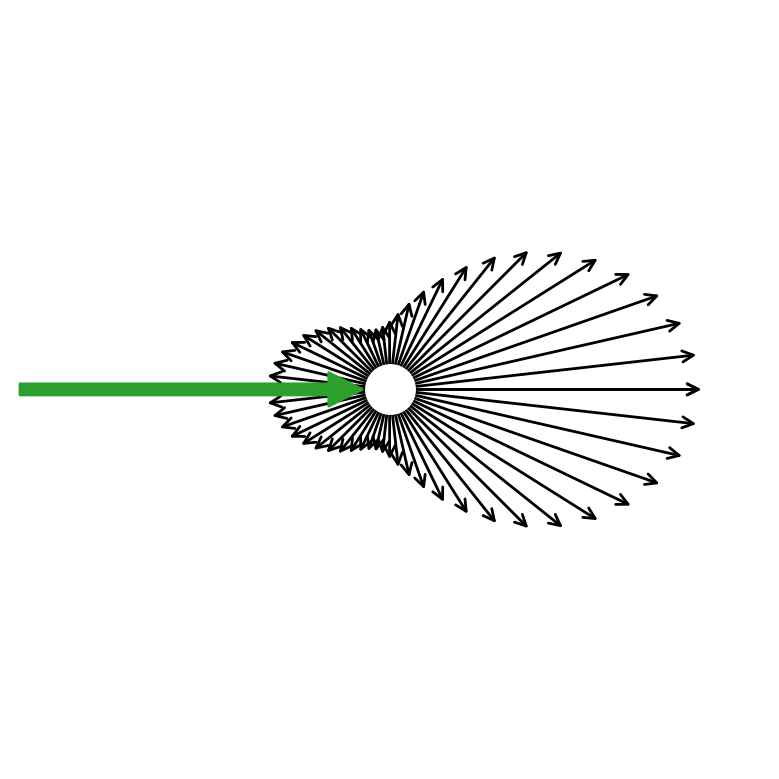

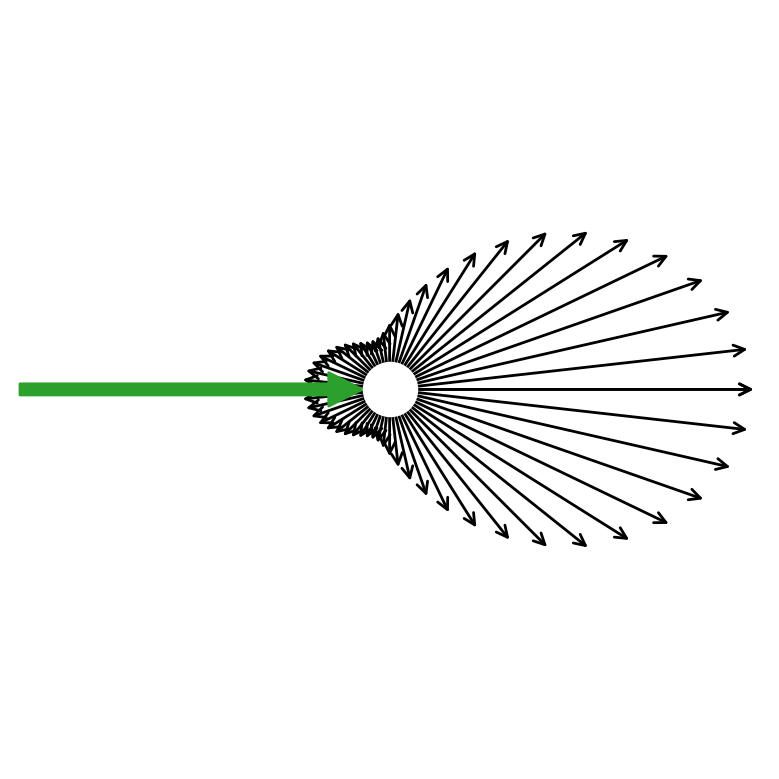

In [241]:
aa = []
rmin = np.min([mie.phase_func.natural.min() for mie in miemie]) * (1-0.5)
rmax = np.max([mie.phase_func.natural.max() for mie in miemie])# * (1+0.5)
rlim = (rmin, rmax)
norm = 'linear'
ato = 0.15
# rlim = None
out = plot(mie1, rlim = rlim, norm = norm, arrow_tip_offset=ato)
aa.append(out[1])
out = plot(mie2, rlim = rlim, norm = norm, arrow_tip_offset=ato)
aa.append(out[1])
out = plot(mie3, rlim = rlim, norm = norm, arrow_tip_offset=ato)
aa.append(out[1])